In [1]:
!pip install librosa
!pip install scipy
!pip install resampy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display

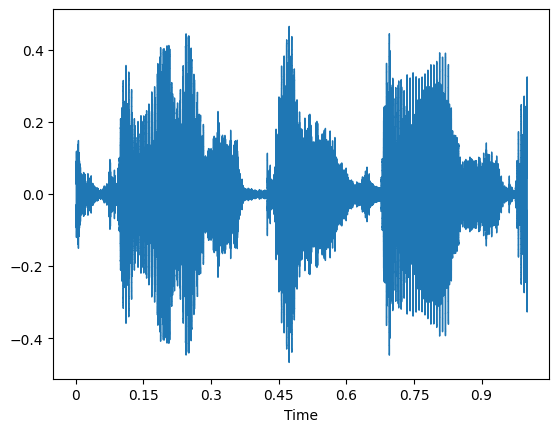

In [3]:
filename=r'D:\DSP Project WAV File\DSP Project WAV File\dataset\fa_him\clip_006.wav'



# Load the audio
data, sample_rate = librosa.load(filename, sr=None)

# Show the waveform
librosa.display.waveshow(data, sr=sample_rate)

# Play the sound
ipd.display(ipd.Audio(data=data, rate=sample_rate))

# Show the waveform plot
plt.show()


In [4]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 087C-5B6B

 Directory of D:\DSP Project WAV File\DSP Project WAV File

12/04/2025  10:46 PM    <DIR>          .
11/08/2025  12:33 AM    <DIR>          ..
11/09/2025  10:44 AM    <DIR>          .idea
11/29/2025  12:11 AM    <DIR>          .ipynb_checkpoints
11/07/2025  12:18 AM    <DIR>          .venv
10/30/2025  12:40 PM       128,231,502 araf.wav
11/29/2025  01:22 AM           122,651 audio_metadata.csv
11/29/2025  12:20 AM    <DIR>          dataset
10/30/2025  12:40 PM       117,092,430 fa him.wav
10/30/2025  12:40 PM        57,606,990 imran.wav
11/29/2025  01:23 AM         1,585,891 mfcc_dataset.csv
11/29/2025  01:23 AM         1,585,894 mfcc_features.csv
10/30/2025  12:40 PM        11,571,278 nayeem.wav
11/29/2025  11:13 AM    <DIR>          saved_models
10/30/2025  12:40 PM       138,212,430 shahed.wav
11/19/2025  08:20 PM            56,109 split_audio.ipynb
10/30/2025  12:40 PM       106,223,694 talukder.wav
11/29/2025  01

In [5]:
sample_rate


48000

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [7]:
data

array([ 0.07081604,  0.08580017,  0.06208801, ..., -0.21574402,
       -0.19638062, -0.17668152], dtype=float32)

In [8]:
wave_sample_rate

48000

In [9]:
wave_audio

array([[   954,   3687],
       [  1020,   4603],
       [   512,   3557],
       ...,
       [-10488,  -3651],
       [-10605,  -2265],
       [-10550,  -1029]], dtype=int16)

In [10]:
import os
import csv
import wave
import contextlib

# ---- YOUR DATASET PATH ----
DATASET_ROOT = r"D:\DSP Project WAV File\DSP Project WAV File\dataset"
OUTPUT_CSV = r"D:\DSP Project WAV File\DSP Project WAV File\audio_metadata.csv"
# ---------------------------

def get_wav_info(path):
    try:
        with contextlib.closing(wave.open(path, 'rb')) as wf:
            frames = wf.getnframes()
            rate = wf.getframerate()
            channels = wf.getnchannels()
            duration = frames / float(rate) if rate > 0 else 0.0
            return duration, rate, channels
    except:
        return None, None, None

def is_wav(filename):
    return filename.lower().endswith(".wav")

def make_csv(dataset_root, output_csv):
    rows = []
    dataset_root = os.path.abspath(dataset_root)

    for root, dirs, files in os.walk(dataset_root):
        rel_path = os.path.relpath(root, dataset_root)

        if rel_path == ".":
            class_name = ""
        else:
            class_name = rel_path.split(os.sep)[0]

        for file in files:
            if is_wav(file):
                full_path = os.path.join(root, file)

                filesize = os.path.getsize(full_path)
                duration, rate, channels = get_wav_info(full_path)

                rows.append({
                    "filepath": os.path.relpath(full_path, dataset_root),
                    "class_name": class_name,
                    "duration_sec": round(duration, 3) if duration else "",
                    "sample_rate": rate if rate else "",
                    "channels": channels if channels else "",
                    "filesize_bytes": filesize
                })

    header = ["filepath", "class_name", "duration_sec", "sample_rate", "channels", "filesize_bytes"]

    with open(output_csv, "w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writeheader()
        for row in rows:
            writer.writerow(row)

    print(f"CSV created: {output_csv}")
    print(f"Total WAV files: {len(rows)}")


if __name__ == "__main__":
    make_csv(DATASET_ROOT, OUTPUT_CSV)
"D:\DSP Project WAV File\DSP Project WAV File\audio_metadata.csv"

CSV created: D:\DSP Project WAV File\DSP Project WAV File\audio_metadata.csv
Total WAV files: 2595


'D:\\DSP Project WAV File\\DSP Project WAV File\x07udio_metadata.csv'

In [11]:
import pandas as pd

# Correct Windows path using raw string
csv_path = r"D:\DSP Project WAV File\DSP Project WAV File\audio_metadata.csv"

# Read the CSV
metadata = pd.read_csv(csv_path)
metadata.head(10000000)

# Show data
print(metadata.head())


              filepath class_name  duration_sec  sample_rate  channels  \
0  fa_him\clip_001.wav     fa_him           1.0        48000         2   
1  fa_him\clip_002.wav     fa_him           1.0        48000         2   
2  fa_him\clip_003.wav     fa_him           1.0        48000         2   
3  fa_him\clip_004.wav     fa_him           1.0        48000         2   
4  fa_him\clip_005.wav     fa_him           1.0        48000         2   

   filesize_bytes  
0          192044  
1          192044  
2          192044  
3          192044  
4          192044  


In [12]:
### Check whether the dataset is imbalanced
## check data with class 
metadata['class_name'].value_counts()

class_name
shahed      720
fa_him      610
talukder    603
imran       601
nayeem       61
Name: count, dtype: int64

In [13]:
#Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. 
#The MFCC summarises the frequency distribution across the window size, 
#so it is possible to analyse both the frequency and time characteristics of the sound.
#These audio representations will allow us to identify features for classification.


mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

#number of MFCC coefficients to extract (40 is common for speech tasks)

(40, 94)


In [14]:
mfccs

array([[-263.75      , -266.46036   , -309.9551    , ..., -329.9636    ,
        -314.5468    , -209.38762   ],
       [  38.796013  ,   55.64057   ,   67.06827   , ...,  138.75397   ,
         183.00389   ,  166.9763    ],
       [ -61.907684  ,  -63.64279   ,  -53.39119   , ...,   -6.5787125 ,
          17.362862  ,   28.962994  ],
       ...,
       [  -4.493932  ,   -3.5783255 ,   -3.771646  , ...,   -1.4543674 ,
          -2.482307  ,   -1.8905138 ],
       [  -7.268704  ,   -9.472398  ,  -10.959852  , ...,    3.3091161 ,
          -1.420747  ,   -2.4262574 ],
       [  -1.4103055 ,    0.56734186,    1.0457939 , ...,   -4.1549377 ,
          -9.712961  ,   -5.322341  ]], dtype=float32)

In [15]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r"D:\DSP Project WAV File\DSP Project WAV File\dataset"
metadata=pd.read_csv( r"D:\DSP Project WAV File\DSP Project WAV File\audio_metadata.csv")
metadata.head(10000)

,filepath,class_name,duration_sec,sample_rate,channels,filesize_bytes
0,fa_him\clip_001.wav,fa_him,1.000,48000,2,192044
1,fa_him\clip_002.wav,fa_him,1.000,48000,2,192044
2,fa_him\clip_003.wav,fa_him,1.000,48000,2,192044
3,fa_him\clip_004.wav,fa_him,1.000,48000,2,192044
4,fa_him\clip_005.wav,fa_him,1.000,48000,2,192044
...,...,...,...,...,...,...
2590,talukder\clip_599.wav,talukder,1.000,44100,2,176444
2591,talukder\clip_600.wav,talukder,1.000,44100,2,176444
2592,talukder\clip_601.wav,talukder,1.000,44100,2,176444
2593,talukder\clip_602.wav,talukder,1.000,44100,2,176444


In [16]:
def features_extractor(file_path):
    # Load the audio file
    #res_type='kaiser_fast' → a resampling method that makes loading faster with small tradeoffs in precision.
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast') 
    
    # Extract MFCC features
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    # Scale the MFCCs (mean across time axis)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

    #It returns a 2D array.(40,N) 
    #40 → number of MFCC coefficients (features per frame)
    #N → number of time frames (depends on audio duration)

In [17]:
pip install librosa soundfile audioread numba resampy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
from tqdm import tqdm
import os
import pandas as pd
import librosa

# Paths
audio_dataset_path = r"D:\DSP Project WAV File\DSP Project WAV File\dataset"
metadata_csv = r"D:\DSP Project WAV File\DSP Project WAV File\audio_metadata.csv"

# Load metadata
metadata = pd.read_csv(metadata_csv)

# MFCC feature extraction function
def features_extractor(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print("Error processing:", file_path, "| Error:", e)
        return None

# Extract features
extracted_features = []

for index, row in tqdm(metadata.iterrows(), total=len(metadata)):
    # Build full path to audio file
    file_name = os.path.join(audio_dataset_path, row["filepath"])
    
    # Class label from CSV
    class_label = row["class_name"]
    
    # Extract MFCC features
    data = features_extractor(file_name)
    
    if data is not None:
        extracted_features.append([data, class_label])

# Convert to DataFrame
mfcc_df = pd.DataFrame(extracted_features, columns=["mfcc", "label"])

print(mfcc_df.head())
print("Total samples:", len(mfcc_df))

# Save to CSV
output_csv = r"D:\DSP Project WAV File\DSP Project WAV File\mfcc_dataset.csv"
mfcc_df.to_csv(output_csv, index=False)

print("MFCC feature extraction complete!")


 46%|████████████████████████████████████▏                                         | 1204/2595 [00:16<00:16, 86.46it/s]C:\Users\mdmeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1588
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████| 2595/2595 [00:35<00:00, 73.70it/s]


                                                mfcc   label
0  [-388.2449, 99.13087, -8.231178, 33.184612, 3....  fa_him
1  [-279.43445, 113.942116, 6.8096037, 39.771557,...  fa_him
2  [-260.04456, 139.32921, 8.431661, 27.91112, -2...  fa_him
3  [-252.89326, 122.76863, 27.523878, 43.472603, ...  fa_him
4  [-245.82233, 92.865204, 22.449747, 41.443047, ...  fa_him
Total samples: 2595
MFCC feature extraction complete!


In [19]:
import pandas as pd

# Convert extracted features to DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

# Show first 10,000 rows (or all if fewer)
print(extracted_features_df.head(10000))

# Optional: save to CSV
output_csv = r"D:\DSP Project WAV File\DSP Project WAV File\mfcc_features.csv"
extracted_features_df.to_csv(output_csv, index=False)

print("Saved extracted features to CSV:", output_csv)


                                                feature     class
0     [-388.2449, 99.13087, -8.231178, 33.184612, 3....    fa_him
1     [-279.43445, 113.942116, 6.8096037, 39.771557,...    fa_him
2     [-260.04456, 139.32921, 8.431661, 27.91112, -2...    fa_him
3     [-252.89326, 122.76863, 27.523878, 43.472603, ...    fa_him
4     [-245.82233, 92.865204, 22.449747, 41.443047, ...    fa_him
...                                                 ...       ...
2590  [-458.7216, 96.55561, 33.006855, 35.50974, 4.1...  talukder
2591  [-384.1459, 96.05785, -1.7062453, 28.21354, 9....  talukder
2592  [-453.38995, 118.206696, 15.317923, 15.233423,...  talukder
2593  [-392.26633, 83.500786, 31.692389, -1.4114616,...  talukder
2594  [-595.5951, 54.830296, 49.968765, 17.990679, -...  talukder

[2595 rows x 2 columns]
Saved extracted features to CSV: D:\DSP Project WAV File\DSP Project WAV File\mfcc_features.csv


In [20]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [21]:
X.shape

(2595, 40)

In [22]:
y.shape

(2595,)

In [23]:
### Label Encoding
y = pd.get_dummies(y).astype(np.float32).values

In [24]:
y.shape

(2595, 5)

In [25]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train

array([[-3.8794022e+02,  1.6734198e+02, -4.3237244e+01, ...,
        -4.0799794e+00, -3.3639092e+00, -2.0824549e+00],
       [-4.5635849e+02,  1.0579534e+02, -1.5060248e+01, ...,
        -2.2634404e+00,  8.7625241e-01,  1.1142027e+00],
       [-2.4205391e+02,  1.1065939e+02,  6.5916667e+00, ...,
        -6.3016519e-02,  7.7885479e-02, -3.3311841e+00],
       ...,
       [-3.3428152e+02,  1.5792834e+02, -5.5832165e+01, ...,
        -5.1285324e+00, -5.4064937e+00, -2.2712939e+00],
       [-5.3832520e+02,  8.4777687e+01, -4.7751743e+01, ...,
         1.3022530e+00, -3.5237868e+00, -2.4668100e+00],
       [-4.7047061e+02,  7.1585358e+01,  2.6301561e+01, ...,
         1.0104181e+00, -7.6928896e-01,  7.3945403e-02]], dtype=float32)

In [27]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
X_train.shape

(2076, 40)

In [29]:
X_test.shape

(519, 40)

In [30]:
y_train.shape

(2076, 5)

In [31]:
y_test.shape

(519, 5)

In [32]:
#Model Creation
import tensorflow as tf
print(tf.__version__)

2.20.0


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [34]:
### No of classes
num_labels=y.shape[1]

In [35]:
#Dense()
model=Sequential()
# First layer with Input
model.add(Input(shape=(40,)))        # Input layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.20))

# Second layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.20))

# Third layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(num_labels, activation='softmax'))


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,905 (175.41 KB)

 Trainable params: 44,905 (175.41 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [38]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification_100.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
44/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2765 - loss: 15.9364
Epoch 1: val_loss improved from None to 0.47809, saving model to saved_models/audio_classification_100.keras
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4330 - loss: 7.6415 - val_accuracy: 0.8555 - val_loss: 0.4781
Epoch 2/100
49/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6509 - loss: 1.9600
Epoch 2: val_loss improved from 0.47809 to 0.07444, saving model to saved_models/audio_classification_100.keras
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7274 - loss: 1.3497 - val_accuracy: 0.9807 - val_loss: 0.0744
Epoch 3/100
54/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8450 - loss: 0.6792
Epoch 3: val_loss improved from 0.07444 to 0.05812, saving model to saved_models/audio_classification_100.keras
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8565 - loss: 0.5797 - val_accuracy: 0.9807 - val_loss: 0.0581
Epoch 4/100
57/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.

In [39]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9865125417709351


In [53]:
from sklearn.preprocessing import LabelEncoder
import os

dataset_dir = r"D:\DSP Project WAV File\DSP Project WAV File\dataset"

class_names = sorted(os.listdir(dataset_dir))   # folder names
labelencoder = LabelEncoder()
labelencoder.fit(class_names)

print("Classes:", labelencoder.classes_)


Classes: ['fa_him' 'imran' 'nayeem' 'shahed' 'talukder']


In [57]:
import numpy as np

filename = r"D:\DSP Project WAV File\DSP Project WAV File\dataset\imran\clip_006.wav"


prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)

# Predict the class probabilities
prediction = model.predict(prediction_feature)

# Get the index of the highest probability
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Map index to label

print(f"Predicted sound class: {predicted_class_index}")
predicted_class = labelencoder.inverse_transform([predicted_class_index])[0]

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted sound class: 1
Predicted class: imran


In [41]:
pip install tensorflow librosa soundfile numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
# Single-cell notebook-friendly converter + checker
# Paste and run in Jupyter. Edit MODEL_PATH and DATASET_DIR as needed.

import os
import numpy as np
import tensorflow as tf
import librosa
import warnings
warnings.filterwarnings("ignore")

# ========== EDIT THESE PATHS ==========
MODEL_PATH = r"D:\DSP Project WAV File\DSP Project WAV File\saved_models\audio_classification_100.keras"
DATASET_DIR = r"D:\DSP Project WAV File\DSP Project WAV File\dataset"  # point to folder with subfolders per person
OUT_TFLITE = "audio_class_quant.tflite"
# ======================================

# MFCC / preprocessing settings (must match training)
SR = 16000
TARGET_DURATION = 1.0
N_MFCC = 13
N_MELS = 40
N_FFT = 512
HOP_LENGTH = int(0.010 * SR)
WIN_LENGTH = int(0.025 * SR)
MAX_FRAMES = int(np.ceil((SR * TARGET_DURATION - WIN_LENGTH) / HOP_LENGTH)) + 1

def load_audio_fixed(path, sr=SR, target_duration=TARGET_DURATION):
    y, _ = librosa.load(path, sr=sr, mono=True)
    target_len = int(sr * target_duration)
    if len(y) < target_len:
        y = np.concatenate([y, np.zeros(target_len - len(y))])
    else:
        y = y[:target_len]
    return y

def compute_mfcc_for_rep(y, sr=SR, n_mfcc=N_MFCC, n_mels=N_MELS, n_fft=N_FFT, hop_length=HOP_LENGTH, win_length=WIN_LENGTH):
    # Pre-emphasis (if used in training)
    y = np.append(y[0], y[1:] - 0.97 * y[:-1])
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length,
                                       win_length=win_length, n_mels=n_mels, power=2.0)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), sr=sr, n_mfcc=n_mfcc)
    mfcc = mfcc.T
    if mfcc.shape[0] < MAX_FRAMES:
        pad_width = MAX_FRAMES - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad_width), (0, 0)), mode='constant')
    else:
        mfcc = mfcc[:MAX_FRAMES, :]
    return mfcc.astype(np.float32)

def collect_wavs(dataset_dir, max_files=50):
    wavs = []
    for root, _, files in os.walk(dataset_dir):
        for f in files:
            if f.lower().endswith(('.wav', '.flac', '.ogg', '.mp3', '.m4a')):
                wavs.append(os.path.join(root, f))
    wavs = sorted(wavs)
    if not wavs:
        raise FileNotFoundError(f"No audio files found under {dataset_dir}")
    return wavs[:max_files]

def representative_data_gen_from_folder(dataset_dir, max_samples=50):
    wavs = collect_wavs(dataset_dir, max_samples)
    def gen():
        for p in wavs:
            y = load_audio_fixed(p)
            mfcc = compute_mfcc_for_rep(y)           # shape: (frames, coeffs)
            inp = np.expand_dims(mfcc, axis=0).astype(np.float32)  # [1, frames, coeffs]
            inp = np.expand_dims(inp, axis=-1)  # [1, frames, coeffs, 1]
            yield [inp]
    return gen, wavs

def convert_keras_to_int8_tflite(keras_path, dataset_dir, out_tflite_path):
    print("Loading Keras model from:", keras_path)
    model = tf.keras.models.load_model(keras_path)
    print("Model loaded. Summary:")
    try:
        model.summary()
    except Exception:
        print("Couldn't print model summary (custom layers?). Continuing conversion...")
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    rep_gen, wav_list = representative_data_gen_from_folder(dataset_dir, max_samples=50)
    converter.representative_dataset = rep_gen
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8
    converter.inference_output_type = tf.int8
    print(f"Using {len(wav_list)} representative audio files for calibration (first: {wav_list[0] if wav_list else 'N/A'})")
    tflite_model = converter.convert()
    with open(out_tflite_path, "wb") as f:
        f.write(tflite_model)
    print("Saved quantized tflite to:", out_tflite_path)
    return out_tflite_path

def print_tflite_size(path):
    s = os.path.getsize(path)
    print(f"\nTFLite file: {path}")
    print(f"Size: {s} bytes ({s/1024:.1f} KB, {s/1024/1024:.3f} MB)")
    return s

def estimate_tflite_peak_tensor_memory(path):
    interpreter = tf.lite.Interpreter(model_path=path)
    interpreter.allocate_tensors()
    tensor_details = interpreter.get_tensor_details()
    dtype_map = {
        np.dtype('int8'): 1, np.dtype('uint8'):1, np.dtype('int16'):2,
        np.dtype('int32'):4, np.dtype('float32'):4, np.dtype('float16'):2,
    }
    total_bytes = 0
    sizes = []
    for t in tensor_details:
        shape = t.get('shape', [])
        try:
            dtype = np.dtype(t.get('dtype').name)
        except Exception:
            dtype = np.dtype('float32')
        n = int(np.prod(shape)) if len(shape)>0 else 0
        bpe = dtype_map.get(dtype, 4)
        size = n * bpe
        sizes.append((t.get('name','<unk>'), size))
        total_bytes += size
    sizes_sorted = sorted(sizes, key=lambda x: x[1], reverse=True)
    print(f"\nInterpreter reports {len(tensor_details)} tensors.")
    print(f"Sum of all tensor buffers (rough): {total_bytes} bytes ({total_bytes/1024:.1f} KB)")
    if sizes_sorted:
        print("Top 5 largest tensors:")
        for name, size in sizes_sorted[:5]:
            print(f"  {name:40} {size:8d} bytes ({size/1024:.1f} KB)")
    return total_bytes, sizes_sorted

# ========== Run conversion & checks ==========
print("Starting conversion and checks...\n")
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model file not found: {MODEL_PATH}")
if not os.path.isdir(DATASET_DIR):
    raise FileNotFoundError(f"Dataset dir not found: {DATASET_DIR}")

try:
    tflite_path = convert_keras_to_int8_tflite(MODEL_PATH, DATASET_DIR, OUT_TFLITE)
except Exception as e:
    print("Conversion failed with exception:")
    raise

# Size + tensor memory estimate
file_size_bytes = print_tflite_size(tflite_path)
total_bytes, sizes_sorted = estimate_tflite_peak_tensor_memory(tflite_path)

# Heuristic interpretation for STM32F746G-DISCO
print("\n--- Heuristic interpretation for STM32F746G-DISCO ---")
if file_size_bytes < 400*1024:
    print("TFLite size < 400 KB: good for flash (likely OK).")
elif file_size_bytes < 700*1024:
    print("TFLite size 400–700 KB: possibly OK, but check firmware size and other resources.")
else:
    print("TFLite size > 700 KB: likely too large for comfortable use on 1MB flash.")

if total_bytes < 180*1024:
    print("Sum of tensors < 180 KB: likely OK for activations on STM32F746G.")
elif total_bytes < 260*1024:
    print("Sum of tensors 180–260 KB: borderline — may need to trim activations / model.")
else:
    print("Sum of tensors > 260 KB: likely too large; reduce model size or use Cube.AI for exact RAM profiling.")

print("\nDone.")


Starting conversion and checks...

Loading Keras model from: D:\DSP Project WAV File\DSP Project WAV File\saved_models\audio_classification_100.keras
Model loaded. Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,717 (526.24 KB)

 Trainable params: 44,905 (175.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,812 (350.83 KB)

Using 50 representative audio files for calibration (first: D:\DSP Project WAV File\DSP Project WAV File\dataset\fa_him\clip_001.wav)
INFO:tensorflow:Assets written to: C:\Users\mdmeh\AppData\Local\Temp\tmph1_2x600\assets


INFO:tensorflow:Assets written to: C:\Users\mdmeh\AppData\Local\Temp\tmph1_2x600\assets


Saved artifact at 'C:\Users\mdmeh\AppData\Local\Temp\tmph1_2x600'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 40), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1824623647760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1824623649488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1824623649680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1824623648720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1824623646032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1824623648528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1824877064464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1824877060624: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved quantized tflite to: audio_class_quant.tflite

TFLite file: audio_class_quant.tflite
Size: 58664 bytes (57.3 KB, 0.056 MB)

Interpreter reports 14 